# A6

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('sales.csv', encoding='unicode_escape')

In [22]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [24]:
pd.set_option('display.max_columns', None)
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df = df.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 
                      'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER',
                      'ORDERDATE', 'STATUS', 'MONTH_ID', 'QTR_ID', 'YEAR_ID'])

In [5]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,Motorcycles,95,S10_1678,USA,Medium


In [6]:
categories = ['PRODUCTLINE', 'PRODUCTCODE','COUNTRY', 'DEALSIZE']

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categories:
    df[col] = le.fit_transform(df[col])

In [8]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,95,0,18,2
1,34,81.35,5,2765.90,1,95,0,6,2
2,41,94.74,2,3884.34,1,95,0,6,1
3,45,83.26,6,3746.70,1,95,0,18,1
4,49,100.00,14,5205.27,1,95,0,18,1


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)

# ELBOW METHOD

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

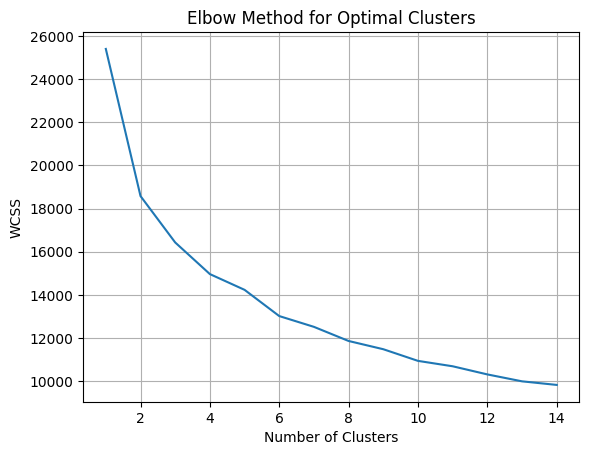

In [12]:
plt.plot(range(1,15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

In [13]:
kmeans

KMeans(n_clusters=14, random_state=15)

In [14]:
# Applying K-Means with the optimal number of clusters (based on the elbow curve)
optimal_k = 5  # You can adjust this based on your elbow plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=15)
df['Cluster'] = kmeans_final.fit_predict(data)

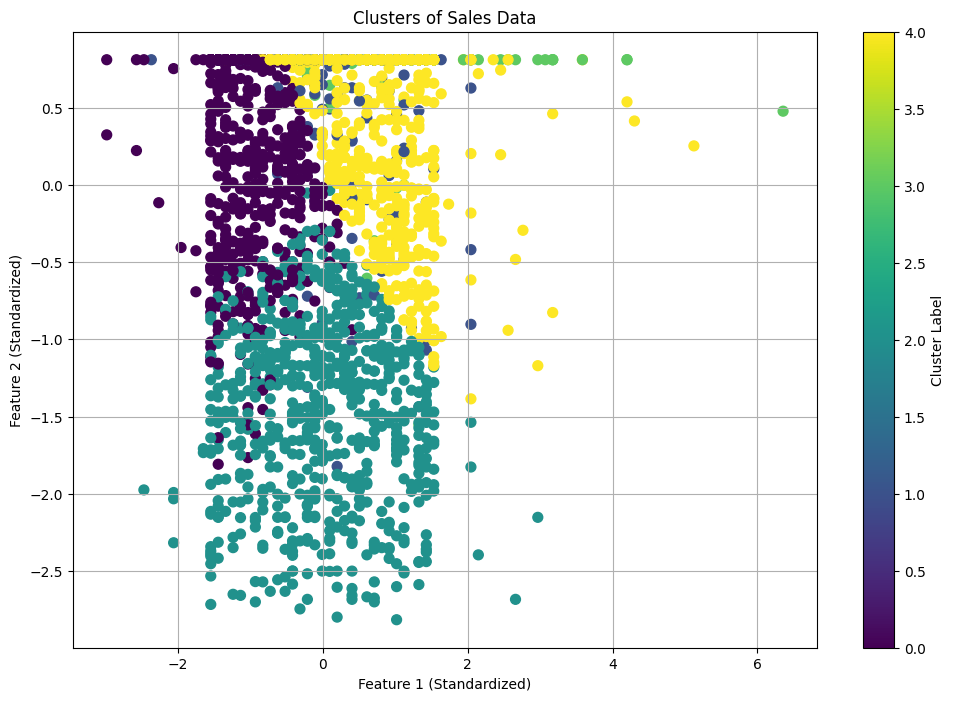

In [15]:
# Visualizing the clusters (optional, for a unique touch)
plt.figure(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters of Sales Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


In [16]:
# Unique and Exciting Aspect: Show the centroids of the clusters
centroids = kmeans_final.cluster_centers_
centroids_scaled = scaler.inverse_transform(centroids)  # Use the fitted scaler to inverse transform
centroid_df = pd.DataFrame(centroids_scaled, columns=df.columns[:-1])  # Exclude 'Cluster' column
print("Centroids of the clusters:\n", centroid_df)

Centroids of the clusters:
    QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER        SALES  PRODUCTLINE  \
0        25.112228  86.907370         6.825796  2283.618593     2.361809   
1        34.761518  97.123767         5.761518  4319.131734     2.067751   
2        34.986706  53.728641         6.496307  1877.143885     3.249631   
3        38.393333  99.546422         6.413333  5944.269600     0.737778   
4        41.486301  92.158247         6.532877  4287.398918     3.280822   

         MSRP  PRODUCTCODE    COUNTRY  DEALSIZE  
0   95.313233    60.440536  11.822446  1.971524  
1  130.067751    30.655827   4.550136  1.048780  
2   59.234860    67.162482  12.122600  2.000000  
3  156.666667    20.502222  14.975556  0.715556  
4   94.275342    68.098630  14.076712  0.969863  


Here's a detailed theoretical overview of the concepts used in your K-Means clustering implementation:

### K-Means Clustering
1. **Definition**: 
   - K-Means is an unsupervised learning algorithm used to partition a dataset into K distinct, non-overlapping subsets (clusters). It minimizes the variance within each cluster.

2. **Algorithm Steps**:
   - **Initialization**: Randomly select K initial centroids from the dataset.
   - **Assignment Step**: Assign each data point to the nearest centroid based on the Euclidean distance.
   - **Update Step**: Calculate the new centroids as the mean of all points assigned to each cluster.
   - **Repeat**: Iterate the assignment and update steps until convergence (when assignments no longer change or a maximum number of iterations is reached).

3. **Distance Metric**: 
   - Typically uses **Euclidean distance** to measure the distance between points and centroids.

4. **Choosing K (Number of Clusters)**: 
   - **Elbow Method**: A graphical method to determine the optimal number of clusters. You plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters (K) and look for an "elbow" point where adding more clusters yields diminishing returns.

### Data Preprocessing
1. **Feature Selection**:
   - Remove irrelevant or redundant features to reduce noise and improve clustering performance. In your case, features like address and contact details were dropped.

2. **Encoding Categorical Variables**:
   - **Label Encoding**: Converts categorical variables into numeric form, allowing them to be processed by the K-Means algorithm.

3. **Standardization**:
   - **StandardScaler**: Normalizes features to have a mean of 0 and a standard deviation of 1, ensuring that no single feature dominates the distance calculations due to differing scales.

### Visualization
1. **Scatter Plots**: 
   - Used to visualize the clusters in a two-dimensional space. Different colors represent different clusters, helping to identify the structure of the data.

2. **Centroids Visualization**:
   - Centroids of each cluster can be plotted to provide insight into the average characteristics of the data points in that cluster.

### Results Interpretation
1. **Cluster Analysis**: 
   - After clustering, analyze the centroids to understand the average properties of each cluster. This can help in identifying patterns or segments within the dataset.

2. **Evaluation**: 
   - Although K-Means does not provide direct evaluation metrics like supervised learning models, you can assess the quality of clusters through internal validation metrics (e.g., silhouette score) or visual inspection.

### Example Code Breakdown
- **Data Loading and Preprocessing**: 
   - Load the dataset, drop irrelevant columns, and encode categorical features.
  
- **Normalization**:
   - Standardize the dataset to ensure that all features contribute equally to the distance calculations in K-Means.

- **Elbow Method Implementation**:
   - Iterate through a range of cluster counts, fit the K-Means model, and record the WCSS to find the optimal K.

- **Final Clustering**:
   - Fit the K-Means model with the selected number of clusters and add the cluster labels to the original DataFrame.

This detailed theoretical understanding of K-Means clustering and the preprocessing steps will help you effectively analyze and interpret your clustering results. If you need further details or specific concepts explained, feel free to ask!